Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


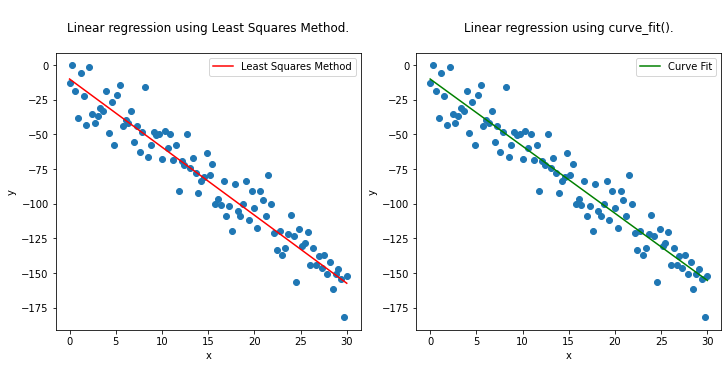

The minimum chi squared value is: 28.99144606508675
The corresponding a parameter is: -4.909819639278557
The corresponding b parameter is: -10.0


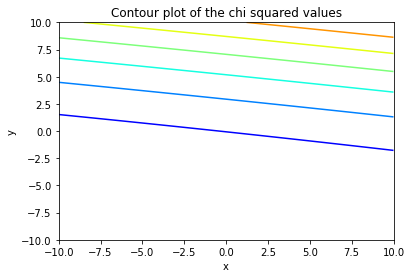

The peak of the contour plot does not correspond to the optimum parameters of the function.


In [ ]:
# Exercise 1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# mount google drive onto code
from google.colab import drive
drive.mount('/content/drive')

# df is defined as the data contained in the CSV file
df = pd.read_csv('/content/drive/MyDrive/Q1_dataset_9.csv')

# the data of x and y is extracted from the file and placed into variables.
x = df['x']
y = df['y']

# part b): the graph seems to follow a linear function in the form f(x) = ax + b.

# function lin_fit() is defined to be used later on with scipy.optimize.curve_fit()
def lin_fit(x,a,b):
    return a * x + b

# using curve_fit(), popt is assigned the optimal values of a and b and pcov is assigned the covariance matrix.
popt, pcov = curve_fit(lin_fit,x,y, bounds=([-10,-10],[10,10]))

# the optimal values of parameters a and b are calculated using curve_fit().
opt_a = popt[0]
opt_b = popt[1]

# the domains of x, y and the uncertainty (to be calculated) are initially set to empty lists.
y_domain = []
x_domain = []
uncertainty_domain = []

# a for loop that iterated over the x domain is created.
for i, j in enumerate(x):
    # an if statement is used to only include values within the specificed [-10,10] domain.
    if j>=-10 and j<=10:
        # every such value is appended to the x or y domain variables.
        x_domain.append(j)
        y_domain.append(y[i])
        # an if statement is used to check if current index is at the edge of the domain.
        # if not, the standard diviation is calculated and appended. if it is, 0 is assigned to the element in the uncertainty_domain.
        # this prevents previous errors that arose from the indeces being out of range.
        if i < 10:
            uncertainty_domain.append(np.std(y[:i+10]))
        elif i > len(y)-11:
            uncertainty_domain.append(np.std(y[i-10:]))
        else:
            uncertainty_domain.append(np.std(y[i-10:i+10]))

# a_values and b_values have been set to the domain of [-10,10] with 500 values to increase
a_values = np.linspace(-10, 10, 500)
b_values = np.linspace(-10, 10, 500)

# a 2D array named "my_array" is created to store the calculated chi squared values.
my_array = np.zeros((len(a_values), len(b_values)))

# the first for loop iterates over all combinations of a values.
for i, a in enumerate(a_values):
    # the second for loop iterates over all combinations of b values.
    for j, b in enumerate(b_values):
        # the value of chi squared is initially set to zero
        chi_squared_value = 0
        # another nested loop is used to iterate over all the values in the x domain ([-10,10].
        for k, x_val in enumerate(x_domain):
            # the chi squared value is calculated using the formula provided for each a and b combination.
            predicted_value = a * x_val + b
            chi_squared_value += ((y_domain[k] - predicted_value)**2) / uncertainty_domain[k]**2
        # the corresponding index is added to "my_array".
        my_array[i, j] = chi_squared_value

# the minimum chi squared value in "my_array" is found using the np.min() function.
min_value = np.min(my_array)

# the indeces of this minimum value are found using the np.where() function.
min_indeces = np.where(my_array == min_value)

# "min_index_a" is set to equal the minimum index along the first axis of the "min_indeces" array.
min_index_a = min_indeces[0][0]

# "min_index_b" is set to equal the minimum index along the second axis of the "min_indeces" array.
min_index_b = min_indeces[1][0]

# "min_a" and "min_b" are therefore the values in the arrays with the corresponding indeces just found.
min_a = a_values[min_index_a]
min_b = b_values[min_index_b]

# variable "new_line" is set to the string '\n' to add new lines in the f-string.
new_line = '\n'

# the data as well as the lines of best fit (using least squares method and curve_fit()) are plotted on two subplots:

# a figure with two side by side subplots is created.
my_figure, my_axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# the data on both subplots is plotted
for i in my_axes:
    i.scatter(x, y)

# the line of best fit for the method of least squares on the left subplot is plotted in red
x_values = np.linspace(min(x), max(x), 100)
y_values_ls = min_a * x_values + min_b
my_axes[0].plot(x_values, y_values_ls, color='red', label='Least Squares Method')
my_axes[0].set_xlabel('x')
my_axes[0].set_ylabel('y')
my_axes[0].set_title(f'{new_line}Linear regression using Least Squares Method.{new_line}')
my_axes[0].legend()

# the line of best fit for the curve_fit() function on the right subplot is plotted in green
y_values_cf = opt_a * x_values + opt_b
my_axes[1].plot(x_values, y_values_cf, color='green', label='Curve Fit')
my_axes[1].set_xlabel('x')
my_axes[1].set_ylabel('y')
my_axes[1].set_title(f'{new_line}Linear regression using curve_fit().{new_line}')
my_axes[1].legend()

# the subplots are presented.
plt.show()

# the minimum chi squared value and its corresponding a and b paramaters are printed below using an f-string.
print(
    f"The minimum chi squared value is: {min_value}{new_line}"
    f"The corresponding a parameter is: {min_a}{new_line}"
    f"The corresponding b parameter is: {min_b}"
)

# creates a contour plot of the chi square values:

# creates a set of subplots
my_figure2, my_axes2 = plt.subplots()

# a contour map is applied onto it, with colormap 'jet'.
f = my_axes2.contour(a_values,b_values,my_array, cmap='jet')

# x and y axis labels and a title are added to the graph.
my_axes2.set_xlabel('x')
my_axes2.set_ylabel('y')
my_axes2.set_title('Contour plot of the chi squared values')

# the contour plot is presented.
plt.show()

# to check whether the graph's peak corresponds to the optimum parameters a and b:

# we find the indeces of the maximum coordinates of the graph, using np.where().
maximum_indeces = np.where(my_array == np.max(my_array))

# 'a_peak' and 'b_peak' are assigned the 'a' values of the maximum value in the my_array using the indeces previously found.
a_peak = a_values[maximum_indeces[0][0]]
b_peak = b_values[maximum_indeces[1][0]]

# 'a_peak' and 'b_peak' are compared to the optimal parameter values:
if a_peak == min_a and b_peak == min_b:
    print("The peak of the contour plot corresponds to the optimum parameters of the function.")
else:
    print("The peak of the contour plot does not correspond to the optimum parameters of the function.")


To increase the accuracy of the parameters a and b, the number of values in the varibles "a_values" and "b_values" have been increased to 300. This increases the accuracy of the grid search (to at least 1 decimal point), which will increase the accuracy of the parameter estimation of a and b used in the line of best fit.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
h/e= -4.562845210405927e-15 +- 6.991620060398035e-17
r= 1.5322939389776133 %
h= 7.310483962419809e-34  m^2 kg / s
deviation from true value:  10.329106045154216 %


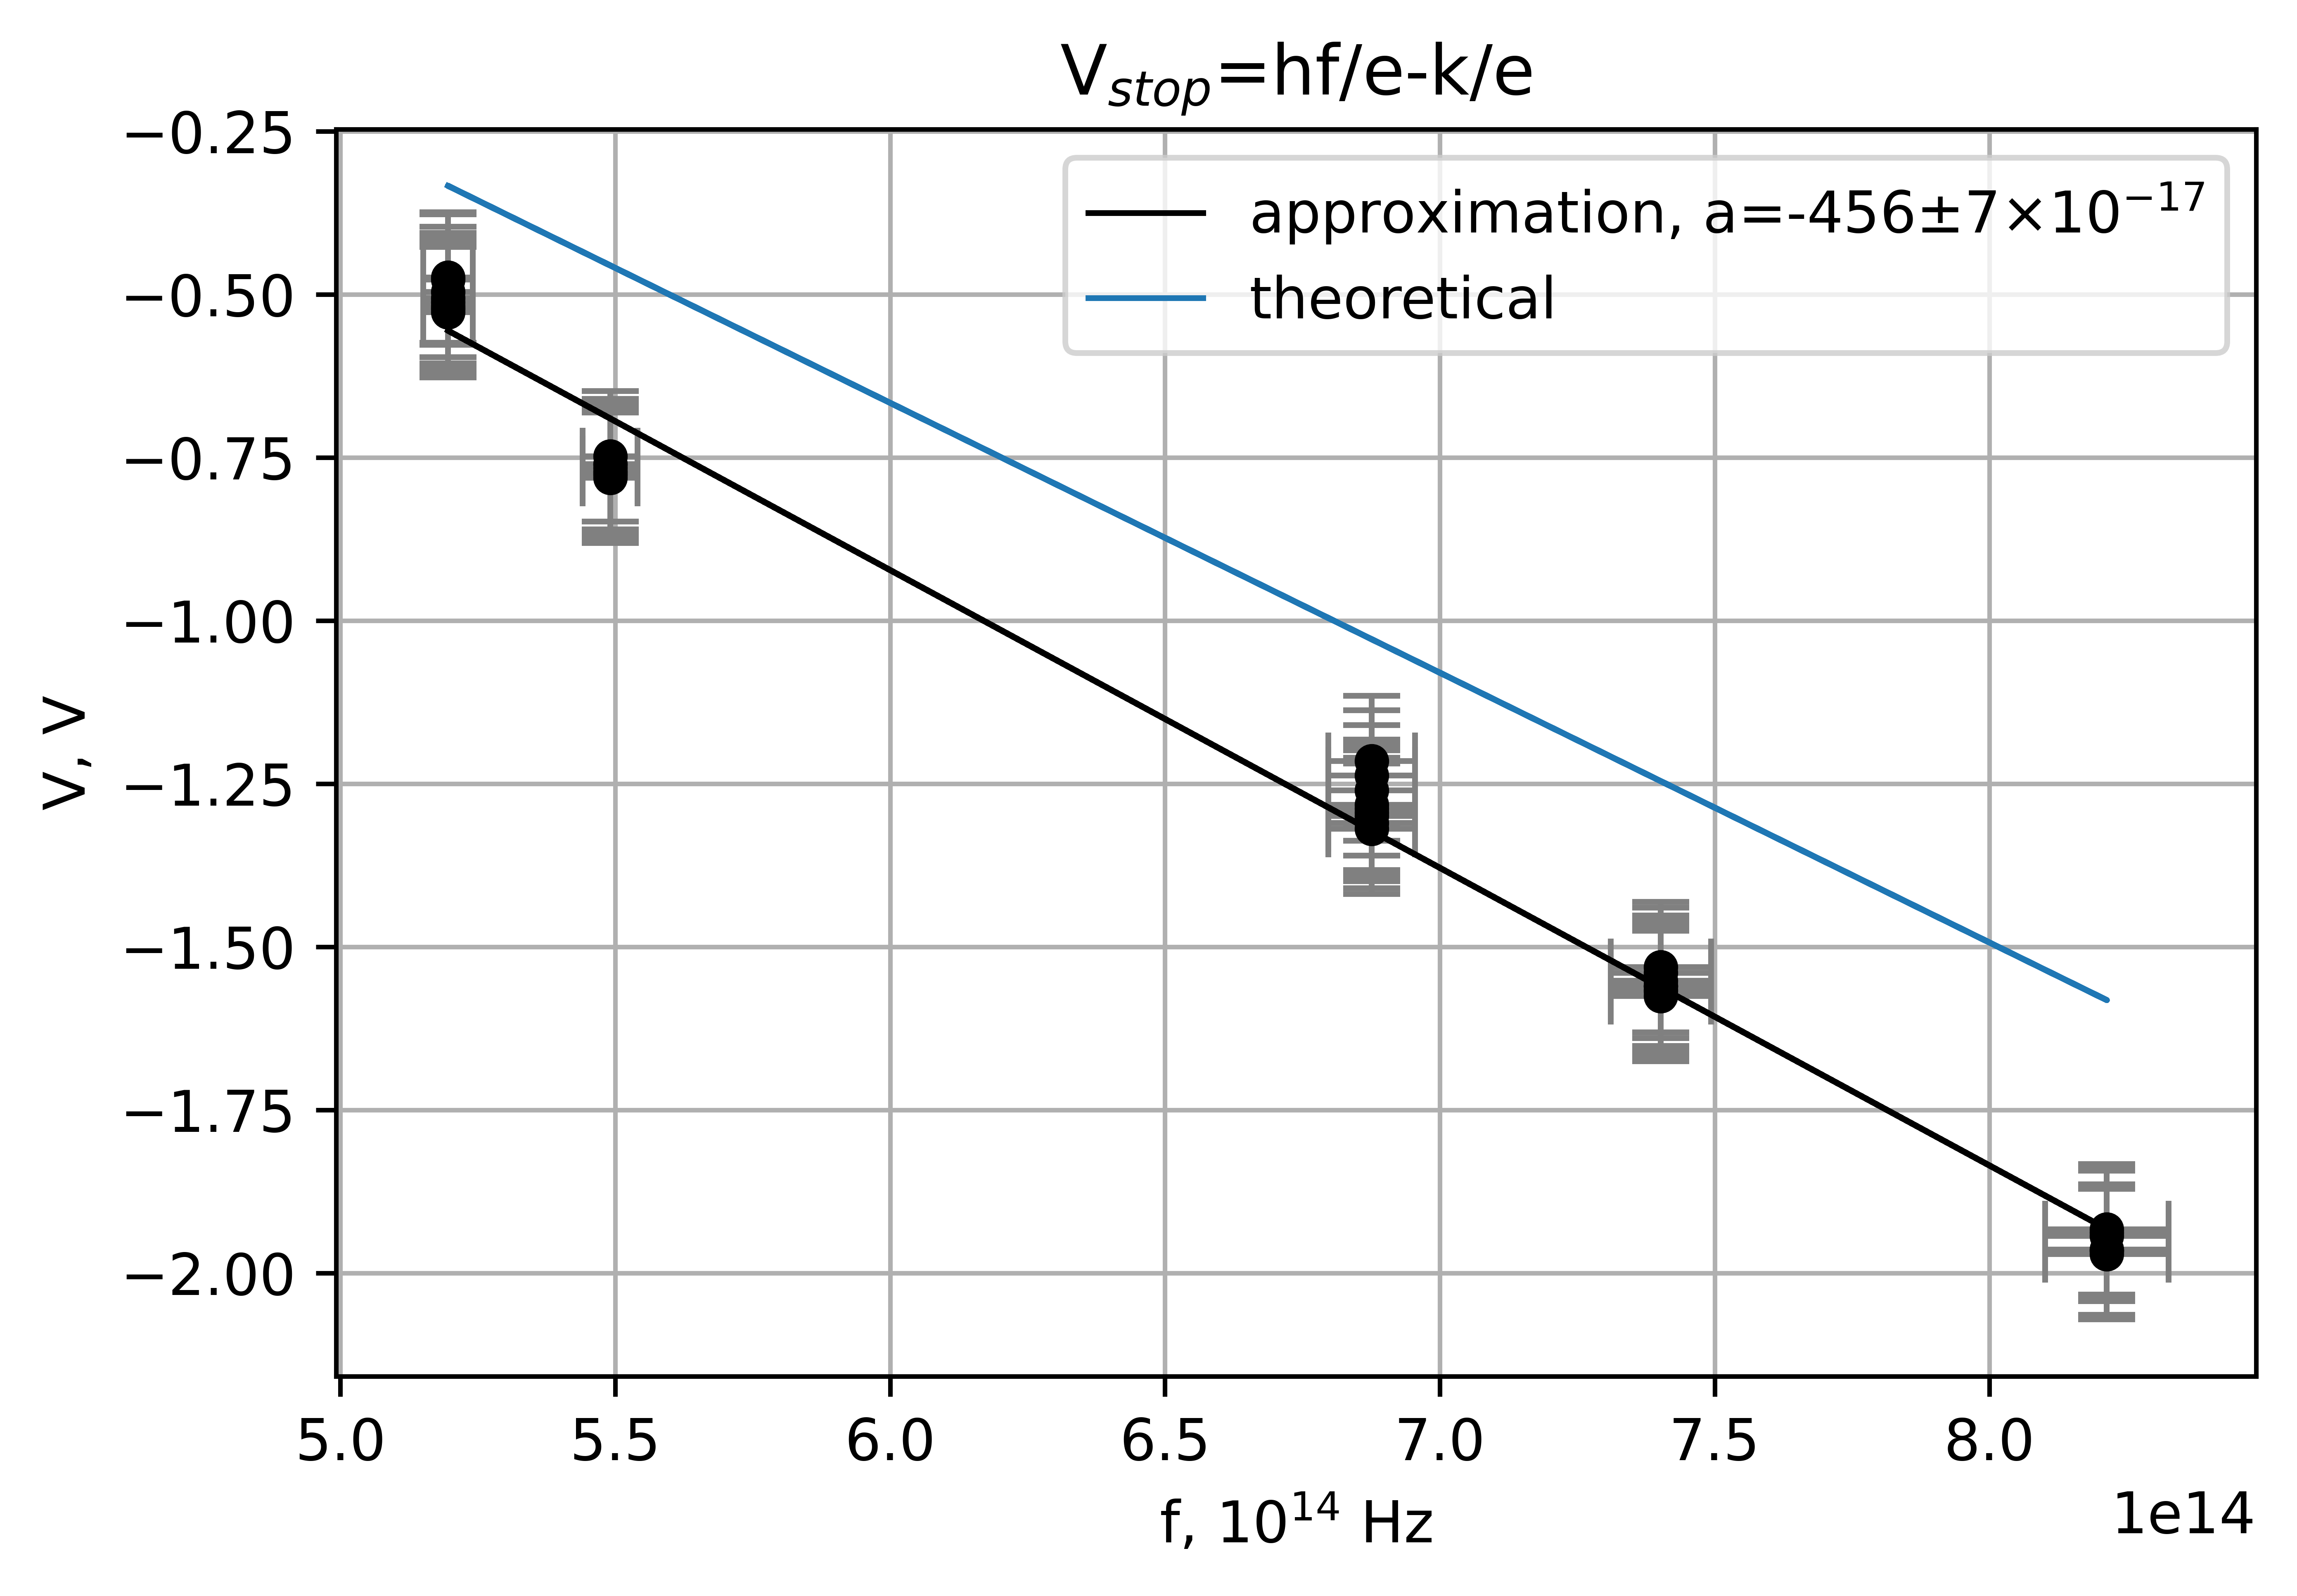

In [ ]:
# Exercise 2

# https://docs.google.com/spreadsheets/d/16MPp_BmoFqUAQd2nytjgMVQJ81XZD4b3oGGn6hL1i_8/edit#gid=0

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
f = pd.read_csv('/content/drive/MyDrive/Data.csv')

# In this block, the code runs though the columns of f and creates arrays for wavelength, stopping potential, and diameter of the diaphragm:
head=[]
for i in f:
  head.append(i)

l=[]
V=[]
d=[]

for i in f[str(head[0])]:
  l.append(i)

for i in f[str(head[1])]:
  V.append(i)

for i in f[str(head[2])]:
  d.append(i)

l=np.array(l)*10**(-9)
V=np.array(V)
d=np.array(d)*10**(-3)

# Values from literature are imported:
e=-1.60217663*10**(-19)
h_true=6.62607015*10**(-34)
c=2.99792458*10**8
f=c/l

# Here, the errors are calculated:
dl=5*10**(-9)
dd=5*10**(-3)
dV=0.1
df=c/(l**2)*dl

plt.figure(dpi=1000)

x=f
y=V
xerr=df
yerr=dV

# This part calculates the parameters of linear approximation utilizing least squares method:
N=len(x)
sumprod=0
for i in range(N):
  sumprod=sumprod+x[i]*y[i]
sumxsqr=0
for i in range(N):
  sumxsqr=sumxsqr+x[i]**2
a=(np.mean(x*y)-np.mean(x)*np.mean(y))/(np.mean(x**2)-np.mean(x)**2)
b=np.mean(y)-a*np.mean(x)
r=y-a*x-b
da=np.sqrt(1/(sumxsqr-N*np.mean(x)**2)*np.sum(r**2)/(N-2))
db=np.sqrt((1/N+np.mean(x)**2/(sumxsqr-N*np.mean(x)**2))*np.sum(r**2)/(N-2))

# The scatter of experimental data with errorbars is being plotted:
plt.errorbar(x,y,xerr=xerr,yerr=yerr,
              ls='',marker='o',ms=5,c='black',
              capsize=5,elinewidth=1,ecolor='grey')

# The linear approximation is created:
plt.plot(x,a*x+b,label='approximation, a='+str(round(a*10**(17)))+'±'+str(round(da*10**(17)))+'×10$^{-17}$',color='black',linewidth=1)

# Usint the true values, the theoretical graph is made:
plt.plot(x,h_true/e*x+b,label='theoretical',linewidth=1)

# Axis labels and title:
plt.xlabel('f, 10$^{14}$ Hz')
plt.ylabel('V, V')
plt.title('V$_{stop}$=hf/e-k/e')
plt.grid()
plt.legend()

# Results in comparison with true value are printed out:
print('h/e=',a,'+-',da)
print('r=',np.abs(da/a*100),'%')
print('h=',a*e,' m^2 kg / s')
print('deviation from true value: ',(a*e-h_true)/h_true*100,'%')